### Installation and Import Dependencies

The following code cell installs the required dependencies and imports the necessary libraries for this notebook.

In [148]:
# Installations:
%pip install easyocr
%pip install imutils

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [149]:
# Imports:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import easyocr
import imutils

### Read the Image, Conversion, Blurring, and Display

In the following code cell, we read the image, convert it to grayscale, apply Gaussian blurring, and display the image.

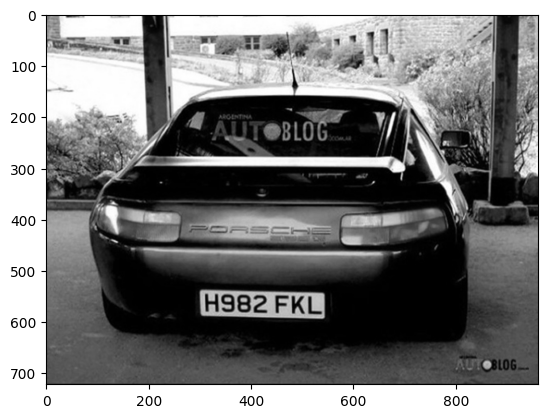

In [150]:
img = cv2.imread('image4.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

### Application of filter, finding edges, and displaying the image

In the following code cell, we apply the filter, find the edges, and display the image. This process is done using the Canny edge detection algorithm. The Canny edge detection algorithm is a multi-step process that involves the following steps:

1. Noise Reduction
2. Gradient Calculation
3. Non-maximum Suppression
4. Double Threshold
5. Edge Tracking by Hysteresis

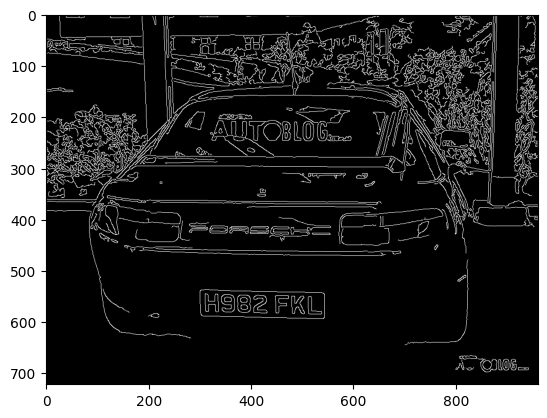

In [151]:
bfilter = cv2.bilateralFilter(gray, 9, 15, 15) #Noise reduction
edged = cv2.Canny(bfilter, 30, 200) #Edge detection
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

### Finding the Contours, Applying the Mask, and Displaying the Image

In the following code cell, we find the contours, apply the mask, and display the image. The mask is applied to the image to highlight the detected edges.

In [152]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

In [153]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break

In [154]:
location

array([[[300, 540]],

       [[306, 589]],

       [[543, 592]],

       [[538, 543]]], dtype=int32)

In [155]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0,255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)


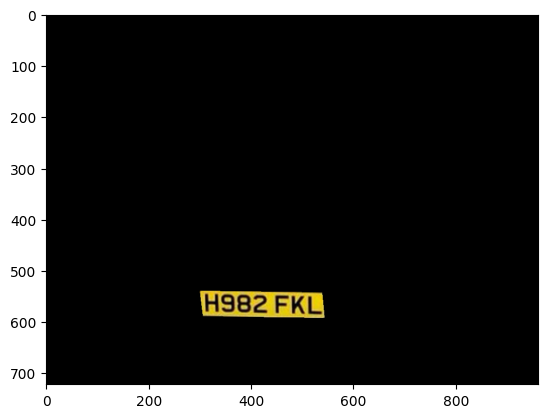

In [156]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [157]:
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]

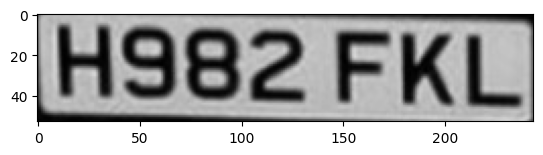

In [158]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

### OCR and Displaying the Text Extracted

In the following code cell, we perform OCR on the image and display the text extracted from the image. The text extracted is displayed in the output cell below the code cell.

In [160]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
result

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


AttributeError: module 'PIL.Image' has no attribute 'Resampling'